In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
time: 431 µs (started: 2024-03-04 04:13:47 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IT_customer_churn.csv to IT_customer_churn.csv
time: 27.3 s (started: 2024-03-04 04:13:47 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

time: 3.33 s (started: 2024-03-04 04:14:14 +00:00)


In [ ]:
data = pd.read_csv('IT_customer_churn.csv',header='infer')
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


time: 164 ms (started: 2024-03-04 04:14:18 +00:00)


<ipython-input-5-9a78be5bc230>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['Churn'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-5-9a78be5bc230>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['Churn'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


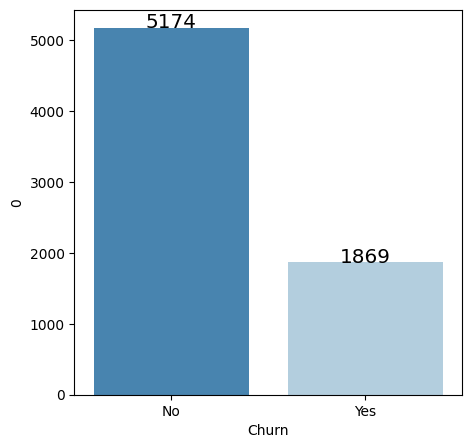

time: 388 ms (started: 2024-03-04 04:14:18 +00:00)


In [ ]:
#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = data.groupby('Churn').size().reset_index()
pal = sns.color_palette("Blues", len(target_group))
rank = target_group["Churn"].argsort().argsort()
g = sns.barplot(x = target_group['Churn'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['Churn'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


time: 148 ms (started: 2024-03-04 04:14:18 +00:00)


In [ ]:
columns_to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaymentMethod', 'PaperlessBilling', 'Contract', 'InternetService', 'MultipleLines']
data = data.drop(columns_to_drop,axis=1)
data.head()

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,1,No,Yes,No,No,No,No,29.85,29.85,No
1,34,Yes,No,Yes,No,No,No,56.95,1889.5,No
2,2,Yes,Yes,No,No,No,No,53.85,108.15,Yes
3,45,Yes,No,Yes,Yes,No,No,42.30,1840.75,No
4,2,No,No,No,No,No,No,70.70,151.65,Yes


time: 77 ms (started: 2024-03-04 04:14:18 +00:00)


In [ ]:
data.dtypes

tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

time: 9.3 ms (started: 2024-03-04 04:14:18 +00:00)


In [ ]:
data.replace(" ", pd.NA, inplace=True)

empty_string_counts = data.isna().sum()

time: 29.2 ms (started: 2024-03-04 04:14:18 +00:00)


In [ ]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	tenure: 0
	OnlineSecurity: 0
	OnlineBackup: 0
	DeviceProtection: 0
	TechSupport: 0
	StreamingTV: 0
	StreamingMovies: 0
	MonthlyCharges: 0
	TotalCharges: 11
	Churn: 0
time: 33 ms (started: 2024-03-04 04:14:19 +00:00)


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

time: 6.04 ms (started: 2024-03-04 04:14:19 +00:00)


In [ ]:
data2 = data['TotalCharges']
data2 = data2.fillna(data2.median())

data['TotalCharges'] = data2

time: 15.9 ms (started: 2024-03-04 04:14:19 +00:00)


In [ ]:
numerical_cols = ['tenure', 'MonthlyChargers' ,'TotalCharges']
categorical_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

time: 719 µs (started: 2024-03-04 04:14:19 +00:00)


In [ ]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

   tenure  MonthlyCharges  TotalCharges Churn  OnlineSecurity_No  \
0       1           29.85         29.85    No                  1   
1      34           56.95       1889.50    No                  0   
2       2           53.85        108.15   Yes                  0   
3      45           42.30       1840.75    No                  0   
4       2           70.70        151.65   Yes                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  ...  \
0                                 0                 1  ...  

In [ ]:
data_encoded.dtypes

tenure                                    int64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                    object
OnlineSecurity_No                         uint8
OnlineSecurity_No internet service        uint8
OnlineSecurity_Yes                        uint8
OnlineBackup_No                           uint8
OnlineBackup_No internet service          uint8
OnlineBackup_Yes                          uint8
DeviceProtection_No                       uint8
DeviceProtection_No internet service      uint8
DeviceProtection_Yes                      uint8
TechSupport_No                            uint8
TechSupport_No internet service           uint8
TechSupport_Yes                           uint8
StreamingTV_No                            uint8
StreamingTV_No internet service           uint8
StreamingTV_Yes                           uint8
StreamingMovies_No                        uint8
StreamingMovies_No internet service     

time: 12.3 ms (started: 2024-03-04 04:14:19 +00:00)


TotalCharges column is supposed to be int but its a string data type instead

In [ ]:
data.shape

(7043, 10)

time: 6.46 ms (started: 2024-03-04 04:14:19 +00:00)


#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

time: 4.93 ms (started: 2024-03-04 04:14:19 +00:00)


In [ ]:
X = data_encoded.drop(columns=["Churn"])
y = data["Churn"]
'''
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
#Standardizing/Normalizing features
'''
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)

pd.DataFrame(precision_recall)

Class distribution after SMOTE:
No     4138
Yes    4138
Name: Churn, dtype: int64
Accuracy rf: 0.7530163236337828


,No,Yes,accuracy,macro avg,weighted avg
precision,0.845382,0.530266,0.753016,0.687824,0.761962
recall,0.812741,0.587131,0.753016,0.699936,0.753016
f1-score,0.828740,0.557252,0.753016,0.692996,0.756870
support,1036.000000,373.000000,0.753016,1409.000000,1409.000000


time: 3.13 s (started: 2024-03-04 04:14:19 +00:00)


Class 0: 4138 samples
Class 1: 4138 samples


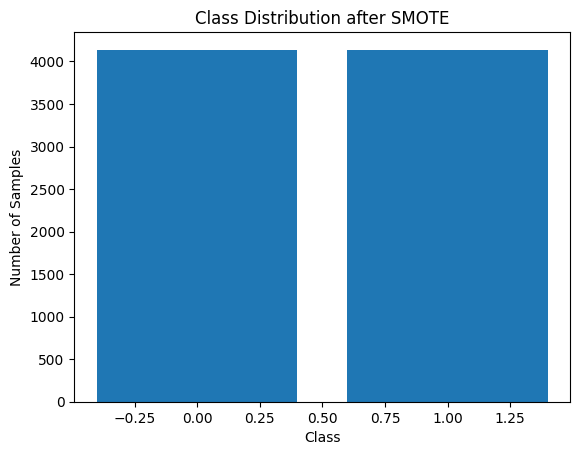

time: 637 ms (started: 2024-03-04 04:14:22 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)

# Count the occurrences of each class in y_train_bal_numeric
class_counts = np.bincount(y_train_bal_numeric)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")

import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[842 194]
 [154 219]]
time: 20.4 ms (started: 2024-03-04 04:14:23 +00:00)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy svm: 0.7338537970191625

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.72      0.80      1036
         Yes       0.50      0.77      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

time: 8.59 s (started: 2024-03-04 04:14:23 +00:00)


In [ ]:
data.shape

(7043, 10)

time: 7.63 ms (started: 2024-03-04 04:14:31 +00:00)


In [ ]:
# Assuming your input data is stored in a numpy array called 'X'
num_features = X.shape[1]  # Number of columns in the array
print("Number of features:", num_features)


Number of features: 21
time: 6.67 ms (started: 2024-03-04 04:14:31 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Churn'], axis=1)
y = data_encoded['Churn']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(21,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn * 100

print("dnn smote test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
259/259 [==============================] - 7s 8ms/step - loss: 0.5359 - accuracy: 0.7389 - val_loss: 0.4922 - val_accuracy: 0.7553
Epoch 2/10
259/259 [==============================] - 2s 7ms/step - loss: 0.5146 - accuracy: 0.7476 - val_loss: 0.4752 - val_accuracy: 0.7602
Epoch 3/10
259/259 [==============================] - 2s 8ms/step - loss: 0.5091 - accuracy: 0.7510 - val_loss: 0.4748 - val_accuracy: 0.7621
Epoch 4/10
259/259 [==============================] - 2s 6ms/step - loss: 0.5053 - accuracy: 0.7557 - val_loss: 0.4716 - val_accuracy: 0.7631
Epoch 5/10
259/259 [==============================] - 2s 7ms/step - loss: 0.5037 - accuracy: 0.7564 - val_loss: 0.4715 - val_accuracy: 0.7621
Epoch 6/10
259/259 [==============================] - 3s 11ms/step - loss: 0.5020 - accuracy: 0.7545 - val_loss: 0.4735 - val_accuracy: 0.7640
Epoch 7/10
259/259 [==============================] - 2s 7ms/step - loss: 0.5005 - accuracy: 0.7577 - val_loss: 0.4693 - val_accuracy: 0.7563
Epoch

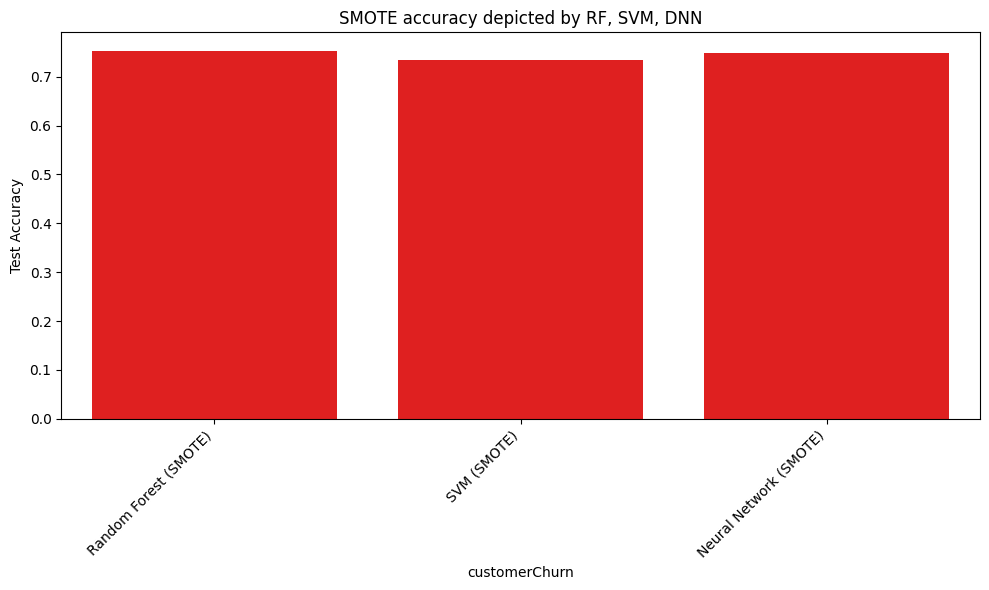

time: 356 ms (started: 2024-03-04 04:15:06 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='red')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

As we can see, the accuracy from DNN with SMOTE sampling is 74%


# **USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before ADASYN:
No     4138
Yes    1496
Name: Churn, dtype: int64
Class distribution after ADASYN:
No     4138
Yes    4119
Name: Churn, dtype: int64
time: 113 ms (started: 2024-03-04 04:15:07 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.7416607523066004


,No,Yes,accuracy,macro avg,weighted avg
precision,0.853684,0.509804,0.741661,0.681744,0.762650
recall,0.782819,0.627346,0.741661,0.705082,0.741661
f1-score,0.816717,0.562500,0.741661,0.689609,0.749419
support,1036.000000,373.000000,0.741661,1409.000000,1409.000000


time: 1.3 s (started: 2024-03-04 04:15:07 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.7182398864442867

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.69      0.78      1036
         Yes       0.48      0.80      0.60       373

    accuracy                           0.72      1409
   macro avg       0.69      0.75      0.69      1409
weighted avg       0.79      0.72      0.73      1409

time: 5.01 s (started: 2024-03-04 04:15:08 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Churn'], axis=1)
y = data_encoded['Churn']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(21,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))
# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)
test_accuracy_percentage = accuracy_dnn_adasyn * 100

print("dnn adaysn test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
259/259 [==============================] - 2s 3ms/step - loss: 0.5337 - accuracy: 0.7353 - val_loss: 0.5318 - val_accuracy: 0.7230
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5126 - accuracy: 0.7466 - val_loss: 0.5171 - val_accuracy: 0.7315
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5080 - accuracy: 0.7506 - val_loss: 0.5125 - val_accuracy: 0.7429
Epoch 4/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5053 - accuracy: 0.7546 - val_loss: 0.5126 - val_accuracy: 0.7410
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.7546 - val_loss: 0.5236 - val_accuracy: 0.7343
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.7571 - val_loss: 0.5123 - val_accuracy: 0.7410
Epoch 7/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.7563 - val_loss: 0.5152 - val_accuracy: 0.7400
Epoch 

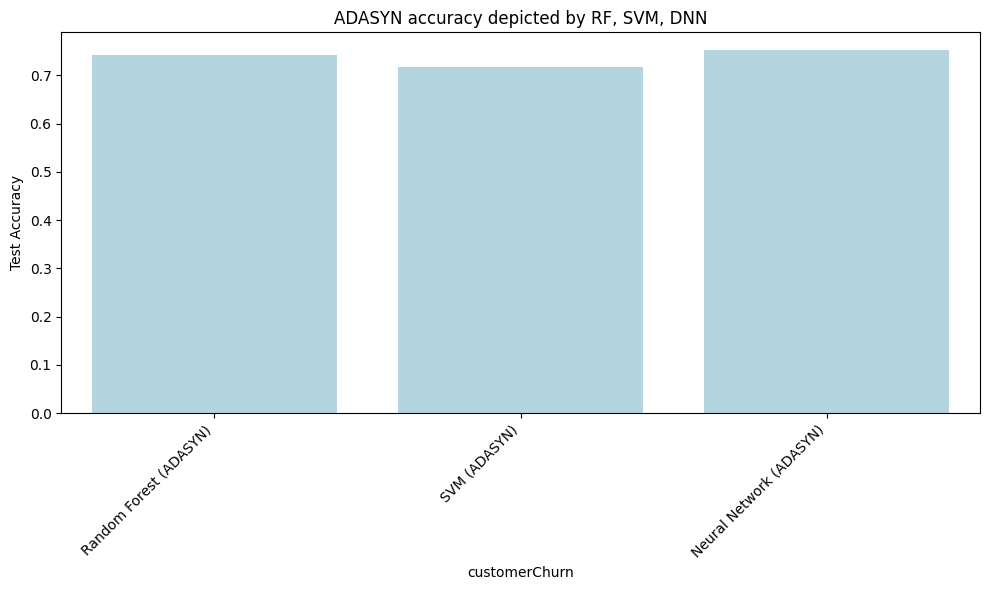

time: 535 ms (started: 2024-03-04 04:15:25 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
No     4138
Yes    4138
Name: Churn, dtype: int64
time: 29.4 ms (started: 2024-03-04 04:15:26 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_oversampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random oversampling :", accuracy_rf_random_oversampling)

pd.DataFrame(precision_recall)

Accuracy rf random oversampling : 0.7673758865248227


,No,Yes,accuracy,macro avg,weighted avg
precision,0.850099,0.555556,0.767376,0.702827,0.772389
recall,0.830443,0.591398,0.767376,0.710921,0.767376
f1-score,0.840156,0.572917,0.767376,0.706536,0.769650
support,519.000000,186.000000,0.767376,705.000000,705.000000


time: 991 ms (started: 2024-03-04 04:15:26 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_oversampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random oversampling :", accuracy_svm_random_oversampling)
print("\nClassification Report:\n", report)

Accuracy svm random oversampling : 0.7375886524822695

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.73      0.80       519
         Yes       0.50      0.77      0.61       186

    accuracy                           0.74       705
   macro avg       0.70      0.75      0.71       705
weighted avg       0.79      0.74      0.75       705

time: 3.86 s (started: 2024-03-04 04:15:27 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Churn'], axis=1)
y = data_encoded['Churn']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(21,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn_random_oversampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_oversampling * 100

print("dnn random oversampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
259/259 [==============================] - 2s 3ms/step - loss: 0.5384 - accuracy: 0.7315 - val_loss: 0.5081 - val_accuracy: 0.7476
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5127 - accuracy: 0.7465 - val_loss: 0.5049 - val_accuracy: 0.7476
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.7539 - val_loss: 0.5020 - val_accuracy: 0.7573
Epoch 4/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5046 - accuracy: 0.7558 - val_loss: 0.5077 - val_accuracy: 0.7582
Epoch 5/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.7579 - val_loss: 0.5131 - val_accuracy: 0.7515
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7589 - val_loss: 0.5142 - val_accuracy: 0.7437
Epoch 7/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4989 - accuracy: 0.7618 - val_loss: 0.5060 - val_accuracy: 0.7476
Epoch 

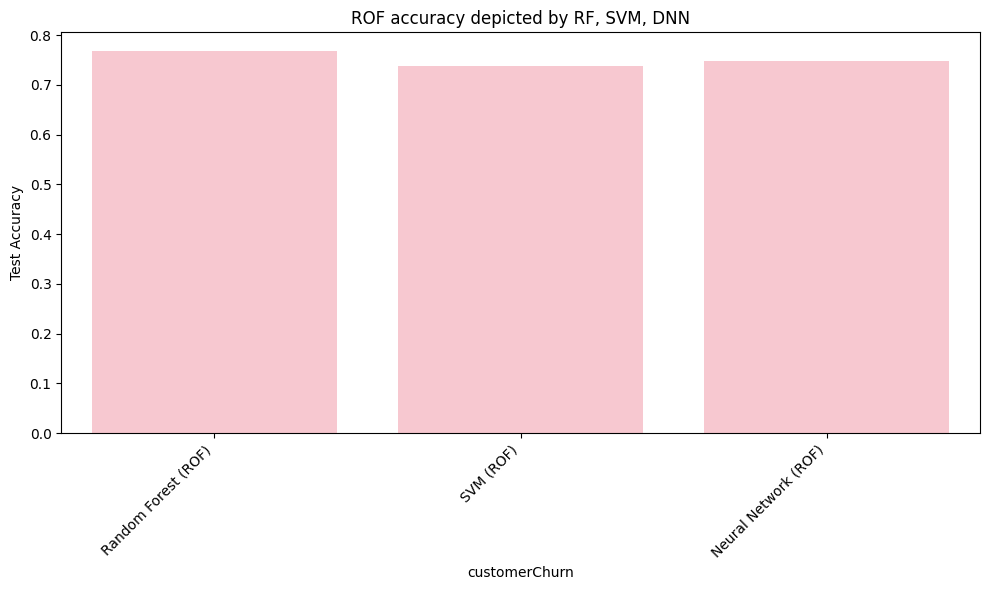

time: 310 ms (started: 2024-03-04 04:15:40 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_random_oversampling,
    'SVM (ROF)': accuracy_svm_random_oversampling,
    'Neural Network (ROF)': accuracy_dnn_random_oversampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
No     1496
Yes    1496
Name: Churn, dtype: int64
time: 32.1 ms (started: 2024-03-04 04:15:41 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_undersampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random undersampling:",accuracy_rf_random_undersampling)

pd.DataFrame(precision_recall)

Accuracy rf random undersampling: 0.723404255319149


,No,Yes,accuracy,macro avg,weighted avg
precision,0.875000,0.483516,0.723404,0.679258,0.771715
recall,0.728324,0.709677,0.723404,0.719001,0.723404
f1-score,0.794953,0.575163,0.723404,0.685058,0.736966
support,519.000000,186.000000,0.723404,705.000000,705.000000


time: 554 ms (started: 2024-03-04 04:15:41 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_undersampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random undersampling:", accuracy_svm_random_undersampling)
print("\nClassification Report:\n", report)

Accuracy svm random undersampling: 0.7432624113475177

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.73      0.81       519
         Yes       0.51      0.77      0.61       186

    accuracy                           0.74       705
   macro avg       0.70      0.75      0.71       705
weighted avg       0.80      0.74      0.76       705

time: 453 ms (started: 2024-03-04 04:15:41 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Churn'], axis=1)
y = data_encoded['Churn']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(21,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))


# Evaluate the model on the test set
loss, accuracy_dnn_random_undersampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_undersampling * 100

print("dnn random undersampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))


Epoch 1/10
259/259 [==============================] - 2s 4ms/step - loss: 0.5361 - accuracy: 0.7315 - val_loss: 0.5072 - val_accuracy: 0.7594
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5142 - accuracy: 0.7494 - val_loss: 0.4901 - val_accuracy: 0.7727
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.7505 - val_loss: 0.4932 - val_accuracy: 0.7674
Epoch 4/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7519 - val_loss: 0.4890 - val_accuracy: 0.7647
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.7537 - val_loss: 0.5013 - val_accuracy: 0.7594
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4986 - accuracy: 0.7579 - val_loss: 0.4898 - val_accuracy: 0.7727
Epoch 7/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7580 - val_loss: 0.4992 - val_accuracy: 0.7754
Epoch 

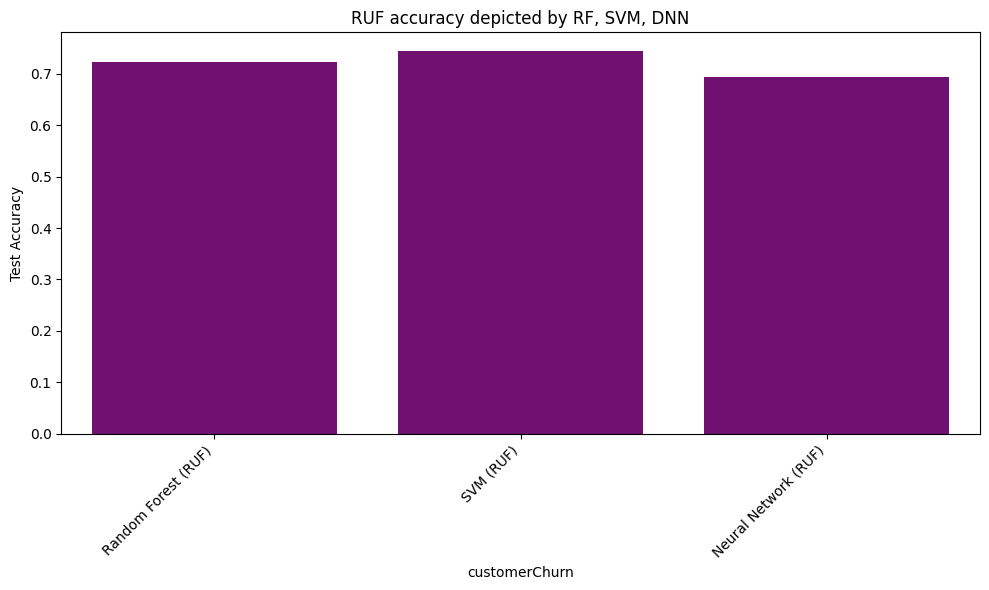

time: 353 ms (started: 2024-03-04 04:15:53 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_random_undersampling,
    'SVM (RUF)': accuracy_svm_random_undersampling,
    'Neural Network (RUF)': accuracy_dnn_random_undersampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **GAMMA DISTRIBUTION SAMPLING (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 'Yes']
X_majority = X_scaled[y == 'No']

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
1.0    1869
0.0    1869
dtype: int64
time: 20 ms (started: 2024-03-04 04:15:54 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)
# Convert float labels in y_pred to string labels
y_pred_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred]

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred_labels, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred_labels)
print("Accuracy rf gamma:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy rf gamma: 0.2680851063829787


,No,Yes,accuracy,macro avg,weighted avg
precision,1.000000,0.264957,0.268085,0.632479,0.806074
recall,0.005780,1.000000,0.268085,0.502890,0.268085
f1-score,0.011494,0.418919,0.268085,0.215207,0.118985
support,519.000000,186.000000,0.268085,705.000000,705.000000


time: 336 ms (started: 2024-03-04 04:15:54 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Convert float labels in y_pred to string labels
y_pred_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred]

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print("Accuracy svm gamma:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy svm gamma: 0.44964539007092197

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.29      0.44       519
         Yes       0.31      0.89      0.46       186

    accuracy                           0.45       705
   macro avg       0.60      0.59      0.45       705
weighted avg       0.73      0.45      0.44       705

time: 254 ms (started: 2024-03-04 04:15:54 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Churn'], axis=1)
y = data_encoded['Churn']

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(21,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))
# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test_numeric)
# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_gamma * 100
print("Test Accuracy dnn gamma: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
259/259 [==============================] - 2s 3ms/step - loss: 0.5468 - accuracy: 0.7258 - val_loss: 0.5025 - val_accuracy: 0.7674
Epoch 2/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5150 - accuracy: 0.7463 - val_loss: 0.4917 - val_accuracy: 0.7594
Epoch 3/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.7533 - val_loss: 0.4928 - val_accuracy: 0.7701
Epoch 4/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5052 - accuracy: 0.7553 - val_loss: 0.4970 - val_accuracy: 0.7674
Epoch 5/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5028 - accuracy: 0.7588 - val_loss: 0.4879 - val_accuracy: 0.7754
Epoch 6/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7566 - val_loss: 0.4803 - val_accuracy: 0.7807
Epoch 7/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.7581 - val_loss: 0.4883 - val_accuracy: 0.7727
Epoch 

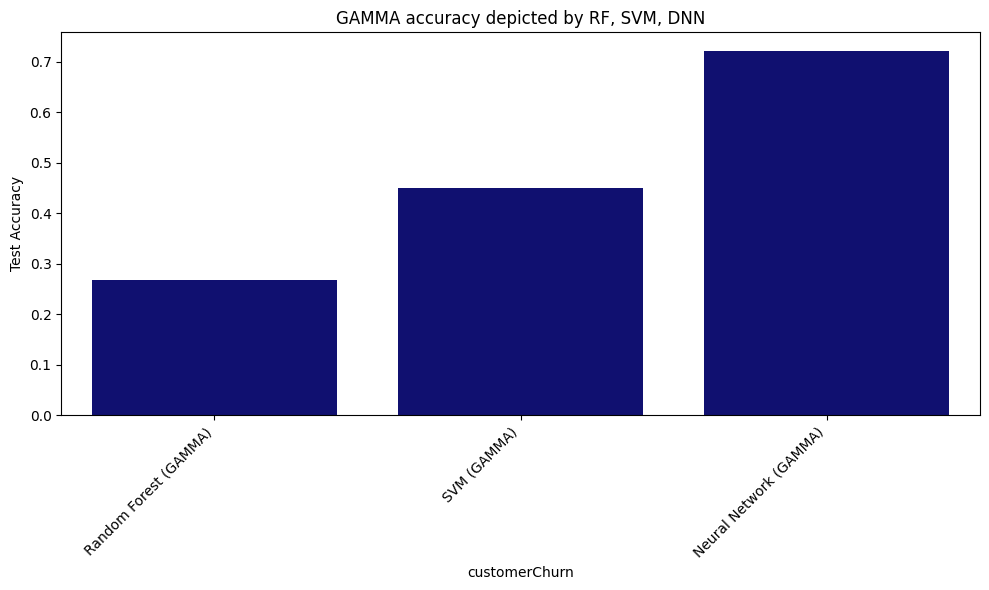

time: 324 ms (started: 2024-03-04 04:16:04 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

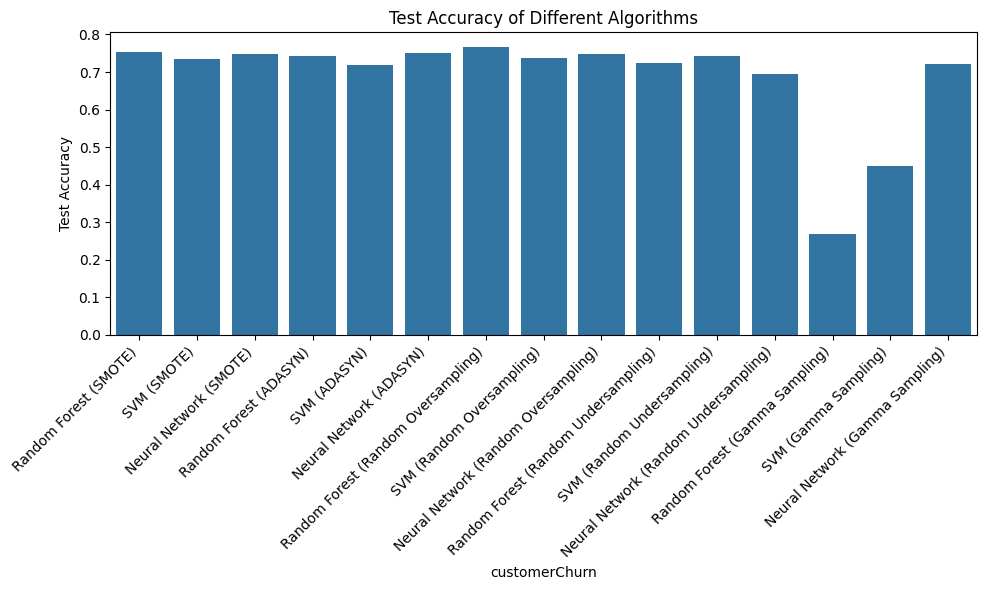

In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_random_oversampling,
    'SVM (Random Oversampling)': accuracy_svm_random_oversampling,
    'Neural Network (Random Oversampling)': accuracy_dnn_random_oversampling,
    'Random Forest (Random Undersampling)': accuracy_rf_random_undersampling,
    'SVM (Random Undersampling)': accuracy_svm_random_undersampling,
    'Neural Network (Random Undersampling)': accuracy_dnn_random_undersampling,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('customerChurn')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()


## **END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_random_oversampling + accuracy_rf_random_oversampling + accuracy_dnn_random_oversampling)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_random_undersampling + accuracy_rf_random_undersampling + accuracy_dnn_random_undersampling)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

time: 523 ms (started: 2024-03-04 04:16:04 +00:00)
SMOTE avg :  74.5268765650998
adasyn avg :  73.72245660396736
ros avg :  75.08274146569254
rus avg :  72.00945708486769
gamma avg :  47.99054378031557
time: 10.7 ms (started: 2024-03-04 04:16:05 +00:00)
